# SK하이닉스 리더십 뉴스 데이터 분석

이 노트북에서는 SK하이닉스의 리더십 관련 뉴스 데이터를 분석하고 시각화합니다.

In [1]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Mecab
from collections import Counter
import re
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
import matplotlib.font_manager as fm

# 나눔고딕 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 폰트 캐시 초기화 (최신 방식)
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
# 데이터 로드
df = pd.read_csv('data/skhynix/leadership_news.csv')

# 날짜 형식 변환
df['date'] = pd.to_datetime(df['date'])

# 기본 데이터 확인
print("데이터 크기:", df.shape)
print("\n컬럼 정보:")
print(df.info())
print("\n처음 5개 행:")
display(df.head())

데이터 크기: (120, 6)

컬럼 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   title     120 non-null    object        
 1   url       120 non-null    object        
 2   date      120 non-null    datetime64[ns]
 3   category  120 non-null    object        
 4   tags      119 non-null    object        
 5   content   120 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 5.8+ KB
None

처음 5개 행:


,title,url,date,category,tags,content
0,[2025 신임임원 인터뷰 5편] SK하이닉스 HBM사업기획 최준용 부사장 “HBM...,https://news.skhynix.co.kr/2025-new-executive-...,2025-04-07,CULTURE &,"HBM, 사업기획, 신임임원 인터뷰","AI 기술의 발전과 함께 이를 뒷받침하는 고대역폭메모리, HBM의 비약적인 성장은 ..."
1,[2025 신임임원 인터뷰 4편] SK하이닉스 SKMS&Growth 이송만 부사장 ...,https://news.skhynix.co.kr/2025-new-executive-...,2025-03-31,CULTURE &,"HRD, SKHU, SKMS, 신임임원 인터뷰",SK하이닉스 경영의 중심에는 ‘SKMS(SK Management System)’가 ...
2,"SK하이닉스 장태수 부사장, 제52회 상공의 날 대통령 표창 수상 “세계 최초 10...",https://news.skhynix.co.kr/award-on-commerce-a...,2025-03-20,CULTURE &,"1cDDR5, D램, 대통령표창, 미세공정, 상공의날",제52회 상공의 날 기념 행사에서 대통령 표창을 받은 SK하이닉스 장태수 부사장(미...
3,"SK하이닉스, GTC 2025서 독보적인 AI 메모리 기술 리더십 선봬\n...의 ...",https://news.skhynix.co.kr/gtc-2025/,2025-03-19,TECH & AI &,"AI, D램, eSSD, GTC, HBM, 낸드플래시",SK하이닉스가 3월 17일부터 21일(현지 시간)까지 미국 캘리포니아주 새너제이(S...
4,[2025 신임임원 인터뷰 2편] SK하이닉스 경영분석 엄재광 부사장 “균형 잡힌 ...,https://news.skhynix.co.kr/2025-new-executive-...,2025-03-10,CULTURE &,"경영분석, 신임임원 인터뷰","SK하이닉스는 지난 2024년, 창사 이래 최대 실적을 기록하며 글로벌 AI 메모리..."


## 1. 기본 데이터 분석

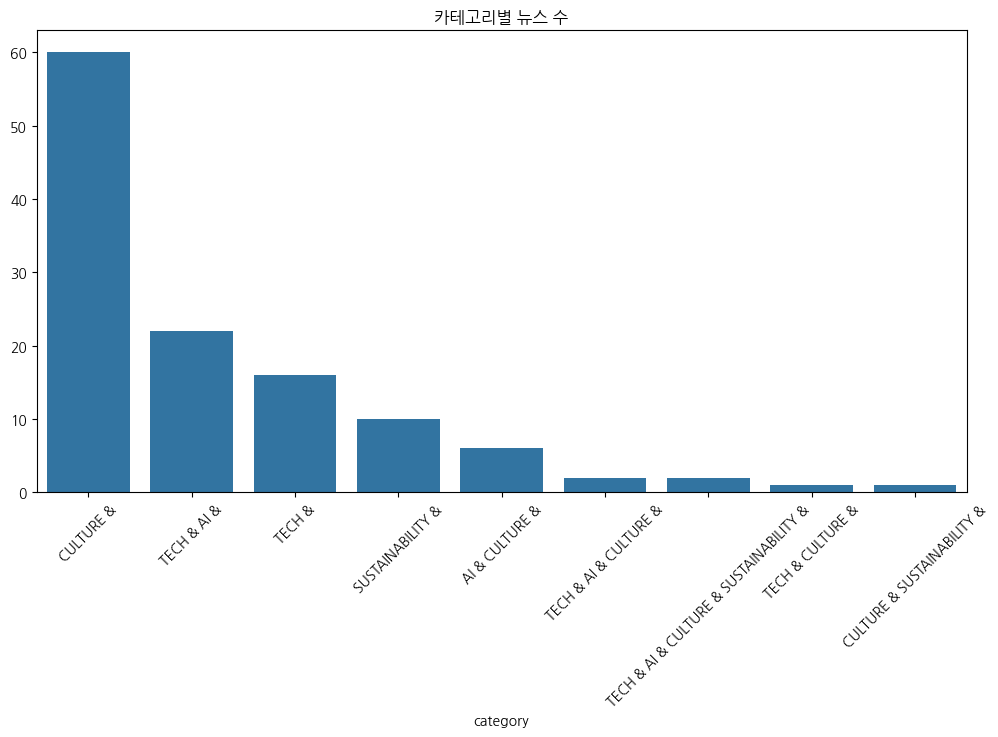

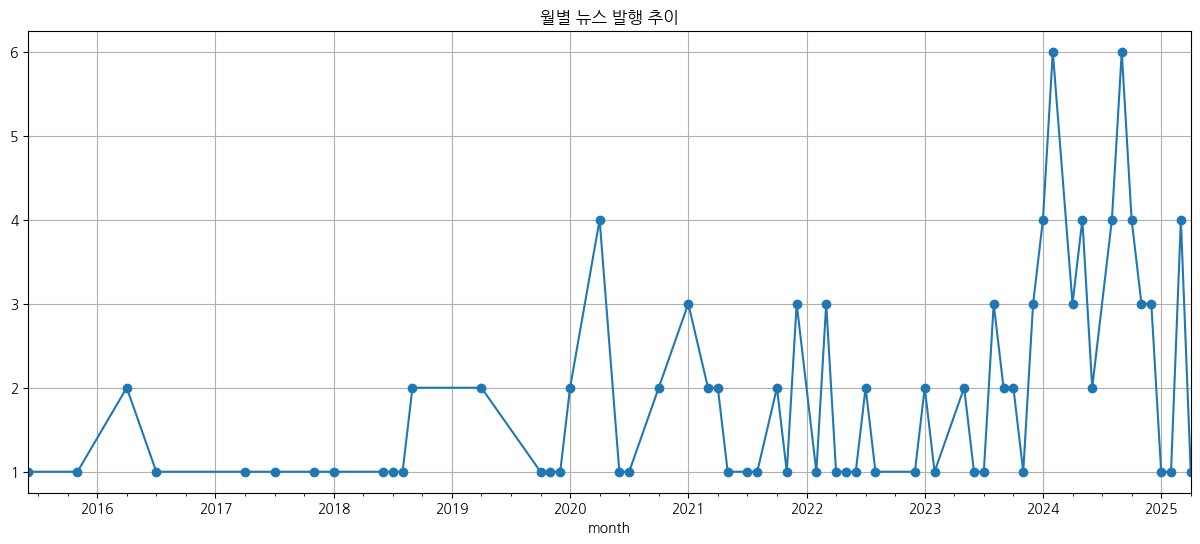

In [2]:
# 카테고리별 뉴스 수 분석
category_counts = df['category'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('카테고리별 뉴스 수')
plt.xticks(rotation=45)
plt.show()

# 월별 뉴스 발행 추이
df['month'] = df['date'].dt.to_period('M')
monthly_counts = df.groupby('month').size()
plt.figure(figsize=(15, 6))
monthly_counts.plot(kind='line', marker='o')
plt.title('월별 뉴스 발행 추이')
plt.grid(True)
plt.show()

## 2. 텍스트 분석 준비

In [3]:
# Mecab 초기화
mecab = Mecab()

# 텍스트 전처리 함수
def preprocess_text(text):
    # 특수문자 제거
    text = re.sub(r'[^\w\s]', ' ', text)
    # 형태소 분석
    morphs = mecab.pos(text)
    # 명사, 형용사, 동사만 추출
    words = [word for word, pos in morphs if pos in ['NNG', 'NNP', 'VA', 'VV']]
    return words

# 전체 텍스트에 대한 형태소 분석
all_words = []
for content in df['content']:
    words = preprocess_text(content)
    all_words.extend(words)

# 단어 빈도수 분석
word_counts = Counter(all_words)
print("가장 많이 등장하는 단어 TOP 20:")
for word, count in word_counts.most_common(20):
    print(f"{word}: {count}")

가장 많이 등장하는 단어 TOP 20:
있: 1569
하이닉스: 1315
기술: 1105
개발: 861
제품: 720
구성원: 629
반도체: 578
메모리: 569
하: 555
회사: 434
데이터: 422
기업: 373
시장: 364
업무: 362
부사장: 346
담당: 345
성능: 321
고객: 287
조직: 284
많: 282


## 3. 리더십 키워드 분석

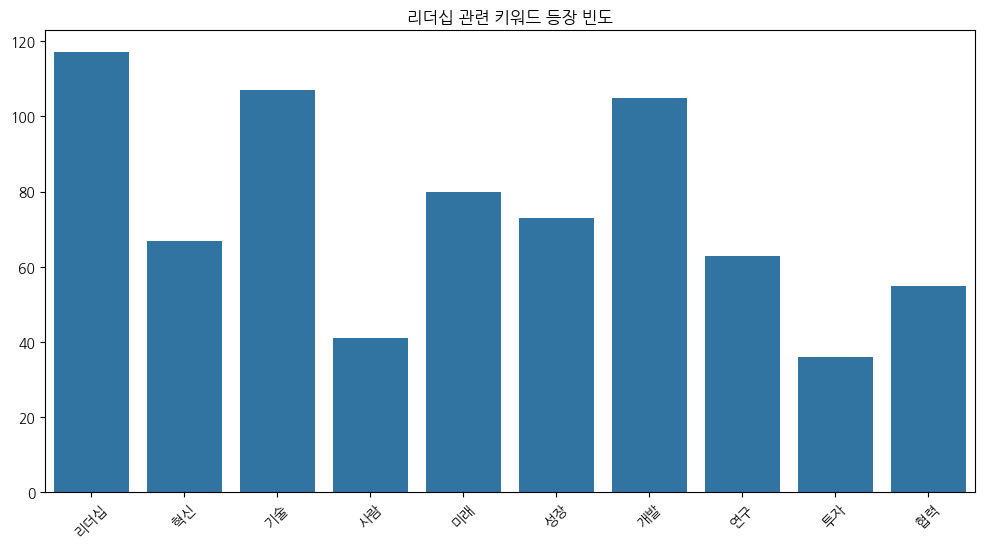

/tmp/ipykernel_25422/736481730.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_count = df.groupby('month').apply(lambda x: sum(1 for content in x['content'] if keyword in content))
/tmp/ipykernel_25422/736481730.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_count = df.groupby('month').apply(lambda x: sum(1 for content in x['content'] if keyword in content))
/tmp/ipykernel_25422/7

<Figure size 1500x800 with 0 Axes>

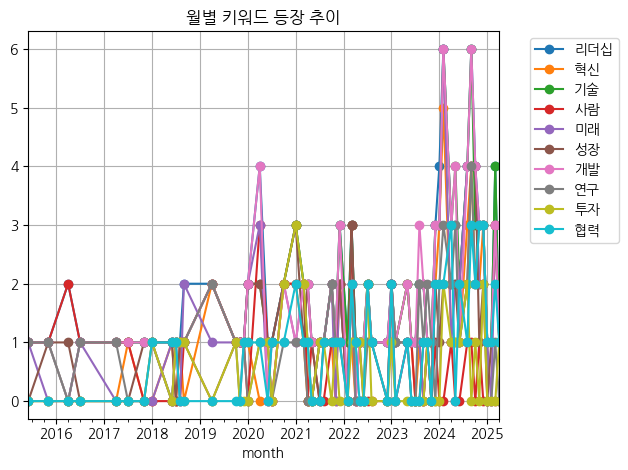

In [4]:
# 반도체 기술 키워드 (기술 탐색형 토픽 유도)
tech_keywords = [
    "HBM", "HBM3", "DDR5", "DDR4", "낸드플래시", "D램", "DRAM",
    "eSSD", "SoC", "16Gb", "12Gb", "10나노", "10nm",
    "미세공정", "광학패터닝", "양산", "초고속", "저전력", "고대역폭", "초미세"
]
# AI/혁신 키워드 (미래 전략/탐색형 토픽 유도)
ai_keywords = [
    "AI", "인공지능", "AI 리더십", "AI 반도체", "데이터센터", "엣지 컴퓨팅",
    "클라우드", "AI 메모리", "AI 생태계", "GTC", "AI 칩", "AI SoC"
]
# 리더십/조직/문화 키워드 (활용형 토픽 유도)
leadership_keywords = [
    "리더십", "변혁적 리더십", "조직문화", "SKMS", "성장", "학습", "리더", "부사장",
    "임원", "신임임원", "경영철학", "비전", "인재육성", "ESG", "지속가능경영"
]
# 기타 전략 및 ESG 연계 키워드
strategy_keywords = [
    "고객 중심", "기술 리더십", "지속가능성", "사회적 가치", "협력 생태계",
    "친환경", "탄소중립", "상생", "글로벌 전략", "공급망", "리스크"
]

# 리더십 관련 키워드 정의
leadership_keywords = ['리더십', '혁신', '기술', '사람', '미래', '성장', '개발', '연구', '투자', '협력']

# 키워드별 등장 빈도 분석
keyword_counts = {}
for keyword in leadership_keywords:
    count = sum(1 for content in df['content'] if keyword in content)
    keyword_counts[keyword] = count

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=list(keyword_counts.keys()), y=list(keyword_counts.values()))
plt.title('리더십 관련 키워드 등장 빈도')
plt.xticks(rotation=45)
plt.show()

# 월별 키워드 추이 분석
monthly_keywords = pd.DataFrame()
for keyword in leadership_keywords:
    monthly_count = df.groupby('month').apply(lambda x: sum(1 for content in x['content'] if keyword in content))
    monthly_keywords[keyword] = monthly_count

plt.figure(figsize=(15, 8))
monthly_keywords.plot(kind='line', marker='o')
plt.title('월별 키워드 등장 추이')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## 4. 워드클라우드 생성

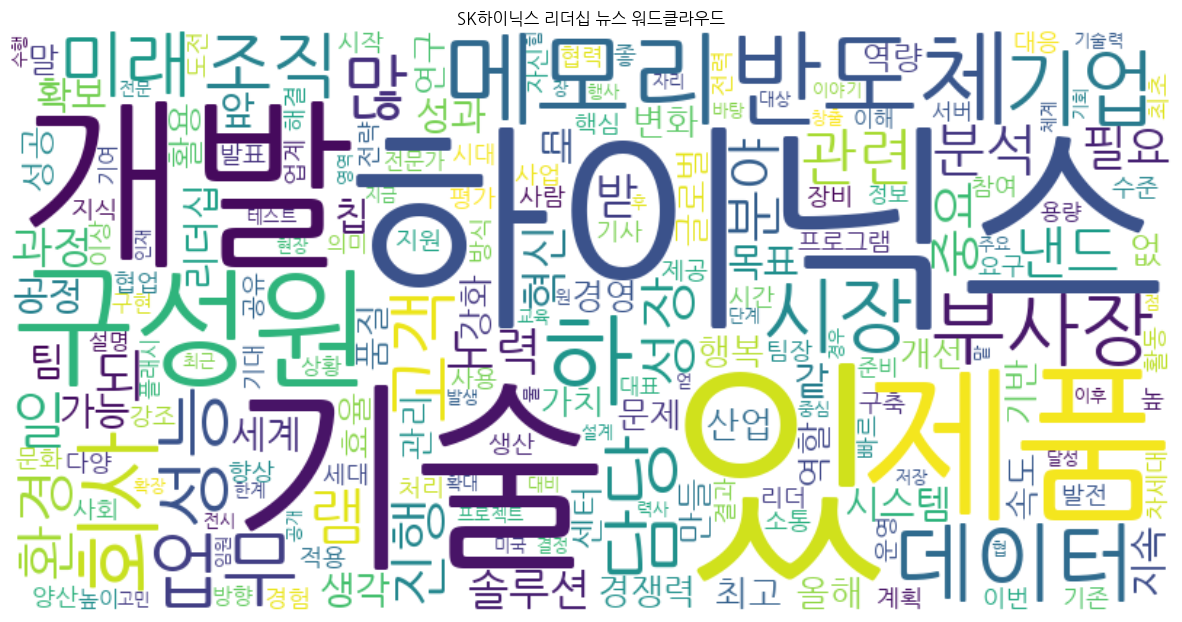

In [5]:
# 워드클라우드 생성
wordcloud = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(word_counts)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('SK하이닉스 리더십 뉴스 워드클라우드')
plt.show()

## 5. 태그 분석

In [8]:
# 데이터 확인
print("tags 열의 데이터 타입:", df['tags'].dtype)
print("\n처음 몇 개의 tags 데이터:")
print(df['tags'].head())
print("\nNaN 값의 개수:", df['tags'].isna().sum())

tags 열의 데이터 타입: object

처음 몇 개의 tags 데이터:
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: tags, dtype: object

NaN 값의 개수: 119


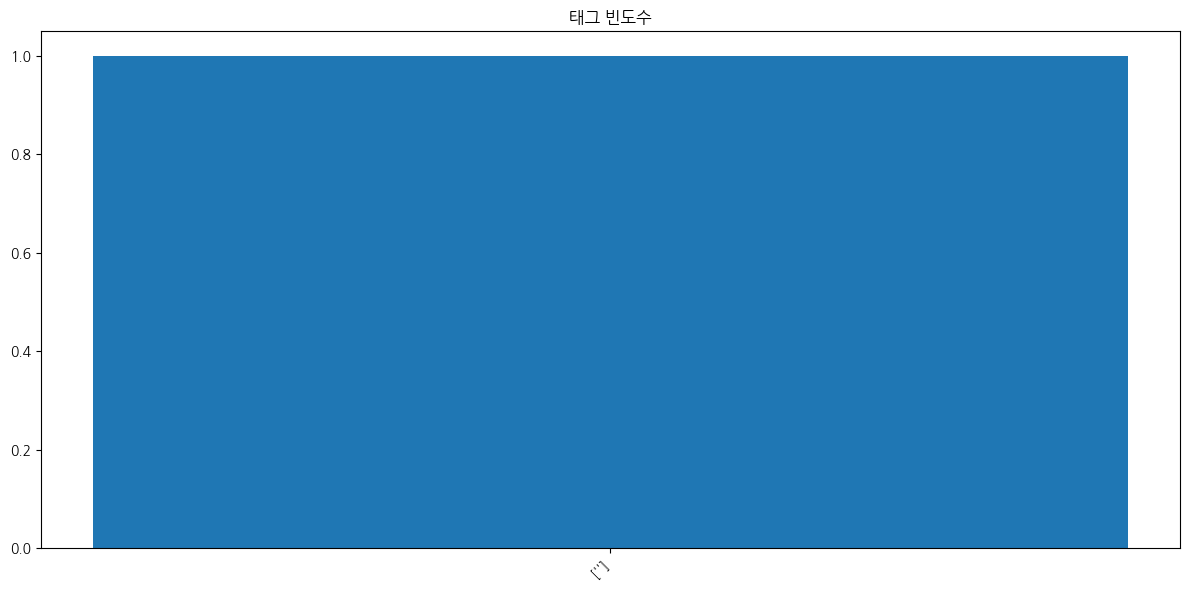

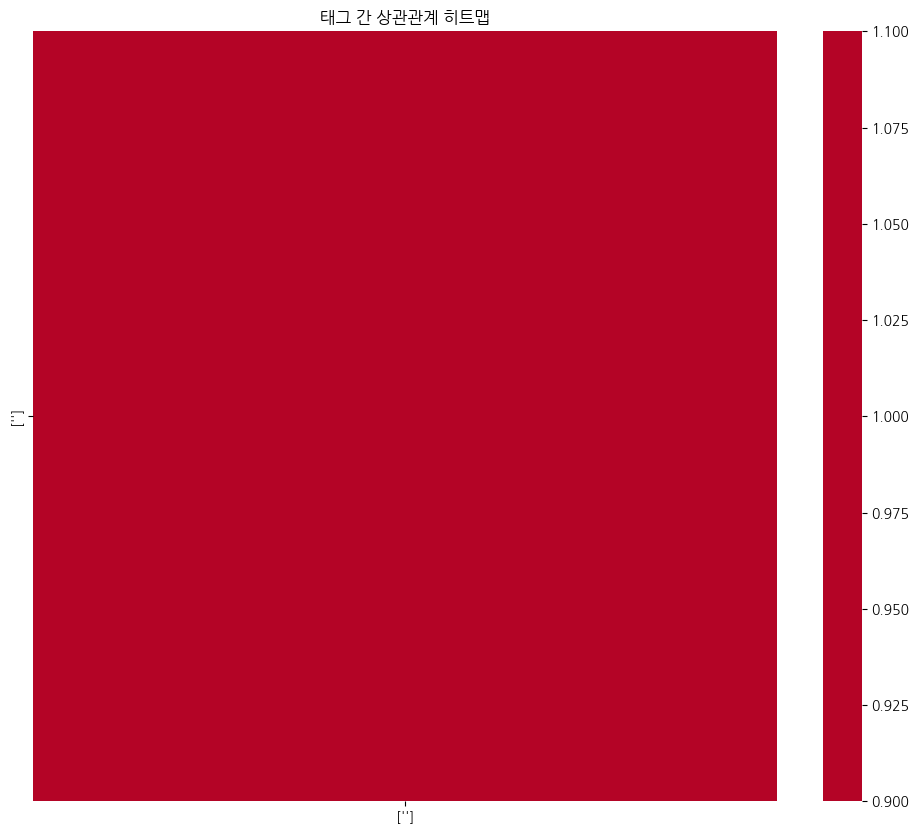

In [9]:
# 태그 데이터 전처리
def process_tags(tag_str):
    if pd.isna(tag_str):  # NaN 체크
        return []
    if isinstance(tag_str, float):  # float 타입 체크
        return []
    return [t.strip() for t in str(tag_str).split(',') if t.strip()]

# 태그 처리
df['tags'] = df['tags'].apply(process_tags)
all_tags = [tag for tags in df['tags'] for tag in tags]
tag_counts = Counter(all_tags)

# 태그 빈도수 시각화
plt.figure(figsize=(12, 6))
plt.bar(tag_counts.keys(), tag_counts.values())
plt.xticks(rotation=45, ha='right')
plt.title('태그 빈도수')
plt.tight_layout()
plt.show()

# 태그 간 상관관계 분석
tag_matrix = pd.DataFrame(0, index=df.index, columns=list(set(all_tags)))
for idx, tags in enumerate(df['tags']):
    for tag in tags:
        tag_matrix.loc[idx, tag.strip()] = 1

tag_correlation = tag_matrix.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(tag_correlation, cmap='coolwarm', center=0)
plt.title('태그 간 상관관계 히트맵')
plt.show()